In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analiticsLabels import *



In [100]:
FILES = [
    'data/4-separate-trees-xvel-10-fov-45.csv',
]

FIELDS = [
    POSITION, DECISION, DECISION_45, DECISION_N45, 
]

In [101]:
def get_savename(f):
    n = f[f.find('4') + 1:f.find('fov') - 1]
    n = n.replace('xvel', 'vel')
    return 'figs/decision' + n + '.pdf'

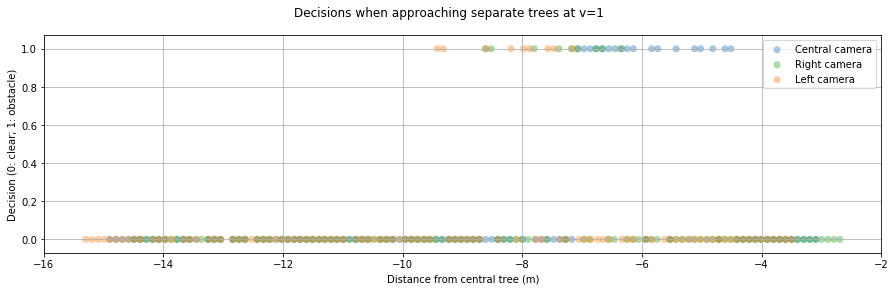

In [102]:
        
for f in FILES:
    data = pd.read_csv(f)
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    data = data[FIELDS]
    data = data[data[POSITION] < 15]
    data = data[data[POSITION] > 3]
    distance = -data[POSITION]
    
    fig, ax = plt.subplots(figsize=(15, 4))
    scale = 50
    ax.scatter(distance, data[DECISION], 
               c=colors[0], s=scale, label='Central camera',
               alpha=0.4, edgecolors='none')
    
    ax.scatter(distance + 0.4, data[DECISION_45], 
               c=colors[2], s=scale, label='Right camera',
               alpha=0.4, edgecolors='none')
    
    ax.scatter(distance - + 0.4, data[DECISION_N45], 
               c=colors[1], s=scale, label='Left camera',
               alpha=0.4, edgecolors='none')
    

    ax.legend()
    ax.set_xlabel('Distance from central tree (m)')
    ax.set_ylabel('Decision (0: clear; 1: obstacle)')
    ax.grid(True)
    fig.suptitle('Decisions when approaching separate trees at v=1')
    fig.savefig(get_savename(f))
    
    
    